In [1]:
steel_plate = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA',header=None)

In [2]:
var_names = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var',header=None)

In [3]:
steel_plate.columns = var_names.loc[:,0]

In [4]:
steel_plate.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [13]:
y = steel_plate.loc[:,'Pastry':'Other_Faults'].idxmax(axis=1)

In [15]:
X = steel_plate.loc[:,'X_Minimum':'SigmoidOfAreas']

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(n_jobs=-1)

In [18]:
y.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
dtype: int64

In [20]:
from sklearn.metrics import make_scorer

In [21]:
def Kohen_kappa(y, y_pred, **kargs):
    try:
        return (cohen_kappa_score(y,y_pred))
    except:
        from sklearn.metrics import cohen_kappa_score
        return (cohen_kappa_score(y,y_pred))
Kappa = make_scorer(Kohen_kappa)

In [22]:
cross_val_score(estimator=knn_model, X=X, y = y, cv=5, 
                scoring=Kappa, n_jobs = -1)

array([0.13442079, 0.30992704, 0.10603101, 0.10914444, 0.16600896])

In [23]:
# from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [24]:
X_scaled = mm.fit_transform(X)

In [25]:
cross_val_score(estimator=knn_model, X=X_scaled, y = y, cv=5, 
                scoring=Kappa, n_jobs = -1)

array([0.40971447, 0.50729702, 0.42882619, 0.64118057, 0.32693403])

In [27]:
X.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,,,,,,,,,,,,,,,,,,,,,
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797


In [57]:
pca = PCA(n_components=2)

In [58]:
pca.fit(X=X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca.explained_variance_ratio_

array([0.95999598, 0.04000375])

In [60]:
X_pca = pca.transform(X)

In [61]:
X_pca

array([[-1951603.26361216,  -179009.7630996 ],
       [ 1254637.11093197,  -196909.72135367],
       [ -137195.24641195,  -198131.69956321],
       ...,
       [-1787725.18464737,  -165917.64135007],
       [-1737177.08162398,  -150854.08086458],
       [-2210371.52201082,  -191139.85456344]])

In [62]:
X_pca_scaled = mm.fit_transform(X_pca)

In [63]:
cross_val_score(estimator=knn_model, X=X_pca, y = y, cv=5, 
                scoring=Kappa, n_jobs = -1)

array([0.13442079, 0.30992704, 0.10603101, 0.11265174, 0.16261505])

In [73]:
best_knn = GridSearchCV(estimator=knn_model, param_grid={'n_neighbors':range(1,30),'weights':['uniform','distance']},
             scoring=Kappa, cv=5, n_jobs=-1)

In [74]:
best_knn.fit(X=X_scaled, y=y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(Kohen_kappa), verbose=0)

In [75]:
best_knn.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [76]:
cross_val_score(estimator=best_knn.best_estimator_, X=X_scaled, y = y, cv=5, 
                scoring=Kappa, n_jobs = -1)

array([0.45612991, 0.50146506, 0.4683466 , 0.63915643, 0.35457656])

In [71]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f2e1de8d0>,
      dtype=object)

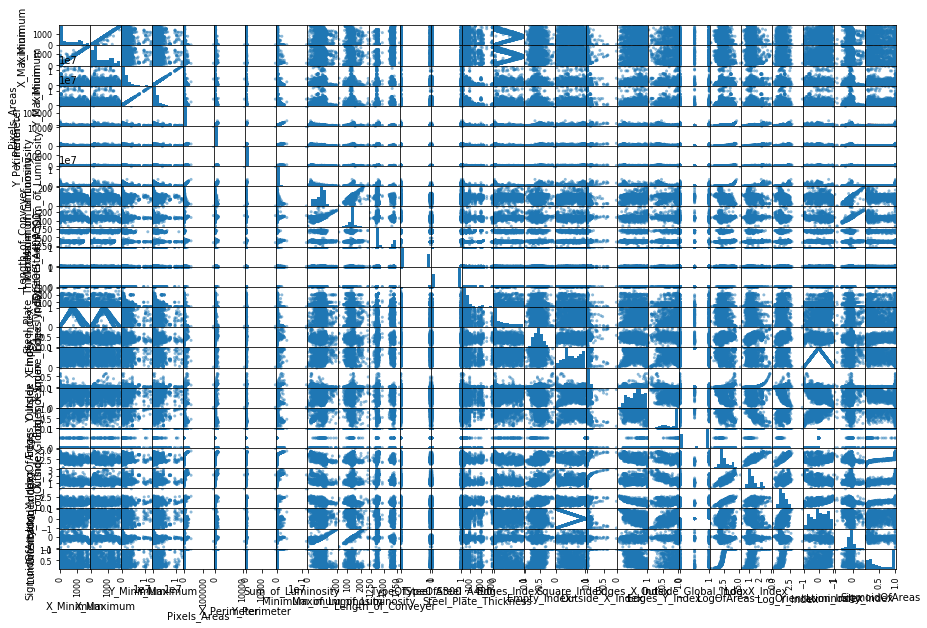

In [72]:
scatter_matrix(X,figsize=(15,10))